In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from datetime import datetime as dt, timedelta

In [3]:
def save_data(df, txt):
    df.to_csv(txt, index=False, encoding="utf-8-sig")
def read_data(txt):
    return pd.read_csv(txt, encoding='utf-8-sig')

# 예보데이터 정리

In [76]:
result_col = ['day', 'value']

In [77]:
column_data = ['day', 'hour', 'forecast', 'value']

In [95]:
main_path = 'Data/동네예보/예보/'

In [79]:
types = ['기온', '습도', '강수확률', '강수형태', '풍속', '풍향', '하늘상태']

In [100]:
data = [0 for i in range(2)] #0: 24hr, 1: 48hr
for i in range(2):
    data_temp = dict()
    for t in types:
        data_temp[t] = pd.DataFrame(columns=result_col)
    
    data[i] = data_temp

In [81]:
def reset_hour(df):
    df['hour'] = df['hour']+100
    return df

In [82]:
import re
def make_date(df):
    date = False
    for i in range(len(df)):
        now = str(df.day[i])
        if len(str(df.day[i]))>3:
            num_str = re.findall("\d+", df.day[i])
            date = num_str[0][:6]
            continue
        if date:
            if int(now) < 10:
                now = '0'+str(int(now))
            else: now = str(int(now))
            hour = '%04d'%(int(df.hour[i]))
            df.day[i] = date + now + hour
            
    return df

In [83]:
def match_t(t):
    if t=='기온': return 'tem'
    elif t=='습도': return 'hum'
    elif t=='강수확률': return 'rain_p'
    elif t=='강수형태': return 'rain_t'
    elif t=='풍속': return 'wind_s'
    elif t=='풍향': return 'wind_d'
    elif t=='하늘상태': return 'sky'
    else:
        raise Error("matcht_ fuction error")

In [84]:
def drop_col(df):
    df.drop(['forecast', 'hour'], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return df

In [85]:
def rename_col(df, t):
    df.rename(columns={'day':'mea_ddhr', 'value':t}, inplace=True)
    return df

In [96]:
# t: 기온/습도같은 str, year은 16, 17형태
def read_file(year, t): 
    path = main_path + year
    temp = pd.read_csv(path+'/'+t+'.csv', encoding='utf-8-sig')
    temp.columns = column_data
    s = ' Start : 20'+year+'0401 '
    temp = pd.DataFrame(np.array([[s, None, None, None]]),\
                      columns=column_data).append(temp, ignore_index=True)

    temp = reset_hour(temp)
    temp = make_date(temp)
    
    d24 = temp.loc[temp['forecast']==25]
    d48 = temp.loc[temp['forecast']==49]
    
    d24 = drop_col(d24)
    d48 = drop_col(d48)
    
    data[0][t] = data[0][t].append(d24)
    data[1][t] = data[1][t].append(d48)
    
    #data[0][t] = rename_col(data[0][t], match_t(t)+'_24')
    #data[1][t] = rename_col(data[1][t], match_t(t)+'_48')

In [ ]:
for t in types:
    read_file('16', t)
    read_file('17', t)
    read_file('18', t)

In [ ]:
# 날씨 데이터 저장
for i in range(2):
    for d in data[i]:
        save_data(data[i][d], 'Data-Results/'+d+'_'+str(i)+'.csv')

In [ ]:
# 날씨 데이터 읽어오기
for i in range(2):
    for d in data[i]:
        data[i][d] = read_data('Data-Results/'+d+'_'+str(i)+'.csv')

테스트데이터 만들기

In [ ]:
for t in types:
    read_file('19', t)

In [ ]:
for i in range(2):
    for t in types:
        rename_col(data[i][t], t)

In [110]:
for i in range(2):
    for t in types:
        save_data(data[i][t], "Data-Results/test/"+t+".csv")

In [126]:
for i in range(2):
    for t in types:
        if len(str(data[i][t]['mea_ddhr'])) < 11:
            continue
        data[i][t]['mea_ddhr'] = pd.to_datetime(str(data[i][t]['mea_ddhr']), format='%Y%m%d%H%M')

ValueError: time data '0       201904010300
1       201904010600
2       201904010900
3       201904011200
4       201904011500
            ...     
2923    202003311200
2924    202003311500
2925    202003311800
2926    202003312100
2927    202003312400
Name: mea_ddhr, Length: 2928, dtype: object' does not match format '%Y%m%d%H%M' (match)

test 데이터 더함

In [144]:
sample = data[0]['기온']
for t in types[1:]:
    sample = pd.merge(sample, data[0][t])

In [146]:
sample2 = data[1]['기온']
for t in types[1:]:
    sample2 = pd.merge(sample2, data[1][t])

In [164]:
pat = '(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})(?P<hour>\d{2})(?P<minute>\d{2})'

In [167]:
sample.mea_ddhr = pd.to_datetime(sample['mea_ddhr'].str.extract(pat, expand=True))

In [168]:
sample2.mea_ddhr = pd.to_datetime(sample2['mea_ddhr'].str.extract(pat, expand=True))

In [ ]:
date = read_data('Data/please.csv')

In [180]:
date.rename(columns={"MEA_DDHR":"mea_ddhr"}, inplace=True)

In [182]:
date.mea_ddhr = pd.to_datetime(date['mea_ddhr'], format='%Y-%m-%d %H:%M')

In [185]:
sample.head()

,mea_ddhr,기온,습도,강수확률,강수형태,풍속,풍향,하늘상태
0,2019-04-01 03:00:00,10.0,30.0,0.0,0.0,4.5,336.0,1.0
1,2019-04-01 06:00:00,11.0,25.0,0.0,0.0,4.8,303.0,1.0
2,2019-04-01 09:00:00,8.0,35.0,20.0,0.0,3.0,285.0,3.0
3,2019-04-01 12:00:00,5.0,55.0,20.0,0.0,3.8,270.0,3.0
4,2019-04-01 15:00:00,4.0,70.0,10.0,0.0,3.1,264.0,2.0


In [188]:
sample1_ = pd.merge(date, sample, how='outer', on='mea_ddhr', sort=True)

In [189]:
sample2_ = pd.merge(date, sample2, how='outer', on='mea_ddhr', sort=True)

In [193]:
sample

,mea_ddhr,기온,습도,강수확률,강수형태,풍속,풍향,하늘상태
0,2019-04-01 03:00:00,10.0,30.0,0.0,0.0,4.5,336.0,1.0
1,2019-04-01 06:00:00,11.0,25.0,0.0,0.0,4.8,303.0,1.0
2,2019-04-01 09:00:00,8.0,35.0,20.0,0.0,3.0,285.0,3.0
3,2019-04-01 12:00:00,5.0,55.0,20.0,0.0,3.8,270.0,3.0
4,2019-04-01 15:00:00,4.0,70.0,10.0,0.0,3.1,264.0,2.0
...,...,...,...,...,...,...,...,...
2923,2020-03-31 12:00:00,9.0,50.0,0.0,0.0,2.5,353.0,1.0
2924,2020-03-31 15:00:00,6.0,70.0,0.0,0.0,1.4,12.0,1.0
2925,2020-03-31 18:00:00,5.0,80.0,0.0,0.0,1.4,352.0,1.0
2926,2020-03-31 21:00:00,4.0,80.0,0.0,0.0,1.4,356.0,1.0


In [194]:
sample1_.interpolate(method='values', inplace=True)

In [195]:
sample2_.interpolate(method='values', inplace=True)

In [200]:
for t in types:
    sample1_.rename(columns={t:match_t(t)+'_24hr'}, inplace=True)

In [202]:
for t in types:
    sample2_.rename(columns={t:match_t(t)+'_48hr'}, inplace=True)

In [203]:
test = list()
test.append(sample1_)
test.append(sample2_)
# test[0] : 24hr, test[1] : 48hr

In [206]:
for i in range(2):
    test[i].drop(0, inplace=True)

In [209]:
test[0].columns

Index(['mea_ddhr', 'tem_24hr', 'hum_24hr', 'rain_p_24hr', 'rain_t_24hr',
       'wind_s_24hr', 'wind_d_24hr', 'sky_24hr'],
      dtype='object')

In [210]:
cols1 = ['sky_24hr', 'rain_t_24hr']
cols2 = ['sky_48hr', 'rain_t_48hr']
for c in cols1:
    test[0][c] = test[0][c].map(lambda x: round(x))
for c in cols2:
    test[1][c] = test[1][c].map(lambda x: round(x))

In [211]:
test[0] = pd.get_dummies(test[0], columns=cols1)
test[1] = pd.get_dummies(test[1], columns=cols2)

In [222]:
save_data(test[0], 'Data-Results/test/test_24hr.csv')
save_data(test[1], 'Data-Results/test/test_48hr.csv')

In [220]:
test[0].rename({'sky_24hr_1':'sky_1_24hr', 'sky_24hr_2':'sky_2_24hr', 'sky_24hr_3':'sky_3_24hr', 'sky_24hr_4':'sky_4_24hr', 
                'rain_t_24hr_0':'rain_t_24hr_0', 'rain_t_24hr_1':'rain_t_1_24hr', 'rain_t_24hr_2':'rain_t_2_24hr', 'rain_t_24hr_3':'rain_t_3_24hr', 'rain_t_24hr_4':'rain_t_4_24hr'}, inplace=True)

In [224]:
date.head()

,mea_ddhr
0,2019-04-01 00:00:00
1,2019-04-01 04:30:00
2,2019-04-01 10:30:00
3,2019-04-01 11:00:00
4,2019-04-01 13:30:00


In [225]:
test[0].head()

,mea_ddhr,tem_24hr,hum_24hr,rain_p_24hr,wind_s_24hr,wind_d_24hr,sky_24hr_1,sky_24hr_2,sky_24hr_3,sky_24hr_4,rain_t_24hr_0,rain_t_24hr_1,rain_t_24hr_2,rain_t_24hr_3,rain_t_24hr_4
1,2019-04-01 03:00:00,10.0,30.000000,0.0,4.500000,336.0,1,0,0,0,1,0,0,0,0
2,2019-04-01 04:30:00,10.5,27.500000,0.0,4.650000,319.5,1,0,0,0,1,0,0,0,0
3,2019-04-01 06:00:00,11.0,25.000000,0.0,4.800000,303.0,1,0,0,0,1,0,0,0,0
4,2019-04-01 09:00:00,8.0,35.000000,20.0,3.000000,285.0,0,0,1,0,1,0,0,0,0
5,2019-04-01 10:30:00,7.0,41.666667,20.0,3.266667,280.0,0,0,1,0,1,0,0,0,0


In [228]:
save_data(pd.merge(date, test[0], on='mea_ddhr', how='left'), 'Data-Results/test/test_24hr_result.csv')
save_data(pd.merge(date, test[1], on='mea_ddhr', how='left'), 'Data-Results/test/test_48hr_result.csv')

현대제철 데이터에 날씨정보 추가

In [ ]:
path = 'Data/현대제철/'
hdata = list()

In [ ]:
# 현대제철 정보 읽어오기
hdata = list()
for i in range(2):
    hdata.append(list())
    for j in range(3):
        fname = 'plant'+str(i+1)+str(j+1)+'_train4.csv'
        hdata[i].append(read_data(path+fname))

In [ ]:
for i in range(2):
    if i==0: hr='24hr'
    else: hr='48hr'
    for d in data[i]:
        data[i][d].columns = ['mea_ddhr', match_t(d)+'_'+hr]

In [ ]:
for i in range(2):
    for d in data[i]:
        data[i][d].astype({'mea_ddhr':'int64'}).dtypes

In [ ]:
for i in range(2):
    for j in range(3):
        for k in range(2):
            for d in data[k]:
                hdata[i][j] = pd.merge(hdata[i][j], data[k][d], how='left')

In [ ]:
# 현대제철 데이터 저장
for i in range(2):
    for j in range(3):
        fname = 'Data-Results/현대제철add/'+'plant'+str(i+1)+str(j+1)+'_train4_add.csv'
        save_data(hdata[i][j], fname)

In [ ]:
for i in range(2):
    for d in data[i]:
        save_data(data[i][d], 'Data-Results/'+d+'_'+str(i)+'.csv')

In [ ]:
for i in range(2):
    for j in range(3):
        hdata[i][j] = hdata[i][j].interpolate(method='values')

# 날씨 예측

In [6]:
# 현대제철 데이터 read
hdata = list()
for i in range(2):
    hdata.append(list())
    for j in range(3):
        fname = 'Data-Results/현대제철0610/'+'plant'+str(i+1)+str(j+1)+'_train4_add.csv'
        hdata[i].append(read_data(fname))

In [ ]:
# 현대제철 데이터 저장
for i in range(2):
    for j in range(3):
        fname = 'Data-Results/현대제철0610/'+'plant'+str(i+1)+str(j+1)+'_train4_add.csv'
        save_data(hdata[i][j], fname)

In [62]:
# 2공장 데이터 다시해야함 (0617)
hdata = list()
for i in range(3):
    fname = 'Data/현대제철/'+'plant2'+str(i+1)+'.csv'
    hdata.append(read_data(fname))

In [136]:
error_list = list()
def make_predict(df, col_txt):
    #col_txt = ['tem_in_loc', 'hum_in_loc', 'tem_coil_loc', 'tem_out_loc', 'hum_out_loc']
    df.mea_ddhr = pd.to_datetime(df.mea_ddhr, format="%Y-%m-%d %H:%M")
    
    i=0    
    for date in df.mea_ddhr:   
        h24 = date+timedelta(days=1)
        h48 = date+timedelta(days=2)
        
        try:
            for col in col_txt:
                df.loc[i, col+"_24hr"] = df[col][df.mea_ddhr==h24].values[0]
                df.loc[i, col+"_48hr"] = df[col][df.mea_ddhr==h48].values[0]
        except:
            error_list.append(h24)
        i+=1

    return df

In [6]:
import os
os.mkdir('Data-Results/현대제철0617/')

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'Data-Results/현대제철0617/'

In [66]:
# 2공장 데이터 다시해야함 (0617)
for j in range(3):
    sj = str(j+1)
    hdata[j].rename(columns={'tem_in_loc'+sj:'tem_in_loc', 'hum_in_loc'+sj:'hum_in_loc', 'tem_coil_loc'+sj:'tem_coil_loc', 'tem_out_loc1':'tem_out_loc', 'hum_out_loc1':'hum_out_loc'}, inplace=True)

In [68]:
col_txt = ['tem_in_loc', 'hum_in_loc', 'tem_coil_loc', 'tem_out_loc', 'hum_out_loc']
for i in range(3):
    for col in col_txt:
        hdata[i][col+'_24hr'] = np.nan
        hdata[i][col+'_48hr'] = np.nan

In [70]:
for i in range(3):
    hdata[i] = hdata[i].interpolate(method='values')

In [71]:
for i in range(3):
    save_data(hdata[i], 'Data-Results/현대제철0617/'+'plant2'+str(i+1)+'_1.csv')

In [61]:
for i in range(3):
    hdata[i] = read_data("Data-Results/현대제철0617/"+"plant2"+str(i+1)+"_1.csv")

In [72]:
# 2공장 데이터 다시해야함 (0617)
for i in range(3):
    hdata[i] = make_predict(hdata[i])
    save_data(hdata[i], 'Data-Results/현대제철0617/'+'plant2'+str(i+1)+'.csv')

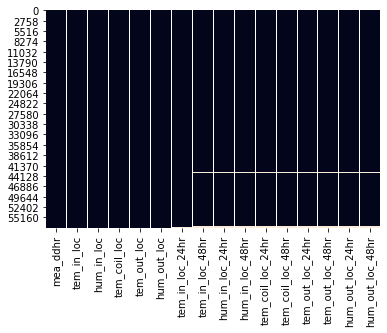

In [74]:
sns.heatmap(hdata[1].isnull(), cbar=False)

In [ ]:
df["mea_ddhr"] = df.iloc[:,0].astype("datetime64[ns]")

In [103]:
for i in range(2):
    for j in range(3):
        hdata[i][j] = make_predict(hdata[i][j])
        save_data(hdata[i][j], "Data-Results/현대제철0611/"+"plant"+str(i+1)+str(j+1)+".csv")

KeyError: 0

## plant2 데이터수정
시계열데이터가 합쳐지지않는다  
근데 안해도될거같다ㅋㅎㅋㅎㅎㅎㅋㅋ

In [41]:
hdata_c = list()
for i in range(1, 4):
    hdata_c.append(read_data("Downloads/plant2"+str(i)+".csv"))

In [43]:
for j in range(3):
    sj = str(j+1)
    hdata_c[j].rename(columns={'tem_in_loc'+sj:'tem_in_loc', 'hum_in_loc'+sj:'hum_in_loc', 'tem_coil_loc'+sj:'tem_coil_loc', 'tem_out_loc'+sj:'tem_out_loc', 'hum_out_loc'+sj:'hum_out_loc'}, inplace=True)

In [39]:
hdata = list()
for j in range(3):
    hdata.append(read_data('Data-Results/현대제철0611/'+'plant2'+str(j+1)+'.csv'))

In [44]:
hdata_c[0].head()

,mea_ddhr,tem_in_loc,hum_in_loc,tem_coil_loc,tem_out_loc,hum_out_loc
0,2016-07-19 18:00,22.39,55.46,27.46,17.72,62.94
1,2016-07-19 21:00,17.81,62.64,27.08,11.37,76.95
2,2016-07-20 0:00,15.13,66.70,26.93,9.79,79.46
3,2016-07-20 3:00,13.82,68.53,26.47,8.35,81.56
4,2016-07-20 6:00,12.93,73.87,26.20,7.68,89.10


In [45]:
hdata[0].head()

,mea_ddhr,tem_in_loc,hum_in_loc,tem_coil_loc,tem_out_loc,hum_out_loc,cond_loc1,cond_24hr,cond_48hr,tem_24hr,...,tem_in_loc_24hr,tem_in_loc_48hr,hum_in_loc_24hr,hum_in_loc_48hr,tem_coil_loc_24hr,tem_coil_loc_48hr,tem_out_loc_24hr,tem_out_loc_48hr,hum_out_loc_24hr,hum_out_loc_48hr
0,2016-04-01 00:00:00,16.0,24.0,11.0,9.0,42.0,0,0,0,20.000000,...,15.0,17.0,41.0,54.0,12.0,14.0,10.0,12.0,57.0,70.0
1,2016-04-01 03:00:00,14.0,28.0,10.0,7.0,59.0,0,0,0,20.000000,...,14.0,16.0,41.0,58.0,10.0,12.0,10.0,10.0,54.0,81.0
2,2016-04-01 06:00:00,13.0,33.0,10.0,6.0,56.0,0,0,0,20.700001,...,13.0,15.0,38.0,60.0,11.0,13.0,9.0,11.0,52.0,76.0
3,2016-04-01 09:00:00,13.0,33.0,10.0,18.0,30.0,0,0,0,17.500000,...,14.0,15.0,41.0,64.0,11.0,13.0,17.0,11.0,37.0,76.0
4,2016-04-01 12:00:00,16.0,28.0,10.0,18.0,20.0,0,0,0,13.300000,...,17.0,16.1,35.0,61.0,13.0,13.0,22.0,13.0,23.0,63.0


In [ ]:
# 시간 타입 변경
for i in range(2):
    for j in range(3):
        hdata[i][j]['mea_ddhr'] = pd.to_datetime(hdata[i][j]['mea_ddhr'], format='%Y%m%d%H%M')

# 머신러닝
맛만봤다

In [ ]:
X = sample.loc[:, x_col]
y = sample.loc[:, y_col]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = X
y_train = y

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
y_pred

In [ ]:
pr_df = pd.DataFrame(data=y_pred, columns=y_test.columns)

In [ ]:
pr_df.to_csv("y_pred.csv", encoding="utf-8-sig")

In [ ]:
y_test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [ ]:
y_pred

# 레이블 인코딩
하늘상태, 강수형태

In [22]:
hdata = list()
for j in range(3):
    hdata.append(read_data('Data-Results/현대제철0611/'+'plant1'+str(j+1)+'.csv'))

In [36]:
hdata[0].columns

Index(['mea_ddhr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc', 'tem_out_loc',
       'hum_out_loc', 'cond_loc1', 'cond_24hr', 'cond_48hr', 'tem_24hr',
       'hum_24hr', 'rain_p_24hr', 'wind_s_24hr', 'wind_d_24hr', 'tem_48hr',
       'hum_48hr', 'rain_p_48hr', 'wind_s_48hr', 'wind_d_48hr',
       'tem_in_loc_24hr', 'tem_in_loc_48hr', 'hum_in_loc_24hr',
       'hum_in_loc_48hr', 'tem_coil_loc_24hr', 'tem_coil_loc_48hr',
       'tem_out_loc_24hr', 'tem_out_loc_48hr', 'hum_out_loc_24hr',
       'hum_out_loc_48hr', 'sky_24hr_1', 'sky_24hr_2', 'sky_24hr_3',
       'sky_24hr_4', 'sky_48hr_1', 'sky_48hr_2', 'sky_48hr_3', 'sky_48hr_4',
       'rain_t_24hr_0', 'rain_t_24hr_1', 'rain_t_24hr_2', 'rain_t_24hr_3',
       'rain_t_48hr_0', 'rain_t_48hr_1', 'rain_t_48hr_2', 'rain_t_48hr_3'],
      dtype='object')

In [25]:
cols = ['sky_24hr', 'sky_48hr', 'rain_t_24hr', 'rain_t_48hr']
for i in range(3):
    for c in cols:
        hdata[i][c] = hdata[i][c].map(lambda x: round(x))

In [29]:
import os
os.mkdir('Data-Results/현대제철0616/')

In [38]:
for i in range(3):
    save_data(hdata[i], 'Data-Results/현대제철0616/'+'plant1'+str(i+1)+'.csv')

In [31]:
for i in range(3):
    hdata[i] = pd.get_dummies(hdata[i], columns=cols)

In [37]:
for i in range(3):
    hdata[i].rename({'sky_24hr_1':'sky_1_24hr', 'sky_48hr_1':'sky_1_48hr',
                     'sky_24hr_2':'sky_2_24hr', 'sky_48hr_2':'sky_2_48hr',
                     'sky_24hr_3':'sky_3_24hr', 'sky_48hr_3':'sky_3_48hr',
                     'sky_24hr_4':'sky_4_24hr', 'sky_48hr_4':'sky_4_48hr',
                     'rain_t_24hr_1':'rain_t_1_24hr', 'rain_t_48hr_1':'rain_t_1_48hr',
                     'rain_t_24hr_2':'rain_t_2_24hr', 'rain_t_48hr_2':'rain_t_2_48hr',
                     'rain_t_24hr_3':'rain_t_3_24hr', 'rain_t_48hr_3':'rain_t_3_48hr',
                     'rain_t_24hr_4':'rain_t_4_24hr', 'rain_t_48hr_4':'rain_t_4_48hr',
                    })

# 전처리언제끝나냐
현대제철 cond 추가

In [127]:
path = 'Data/'

In [128]:
cond = read_data(path+'plant2_train_new.csv')

In [129]:
cond = cond.iloc[:, [1, 13, 14, 15]]

In [130]:
cond

,plant2_train.mea_ddhr,plant2_train.cond_loc1,plant2_train.cond_loc2,plant2_train.cond_loc3
0,2016-07-19 18:00,0.0,0.0,0.0
1,2016-07-19 21:00,0.0,0.0,0.0
2,2016-07-20 0:00,0.0,0.0,0.0
3,2016-07-20 3:00,0.0,0.0,0.0
4,2016-07-20 6:00,0.0,0.0,0.0
...,...,...,...,...
57909,2019-03-31 23:10,0.0,0.0,0.0
57910,2019-03-31 23:20,0.0,0.0,0.0
57911,2019-03-31 23:30,0.0,0.0,0.0
57912,2019-03-31 23:40,0.0,0.0,0.0


In [131]:
cond.rename(columns=lambda x: x[len('plant2_train')+1:], inplace=True)

In [132]:
plant = list()
for i in range(3):
    plant.append(read_data('Data-Results/현대제철0617/'+'plant2'+str(i+1)+'.csv'))

In [133]:
cond.mea_ddhr = pd.to_datetime(cond['mea_ddhr'], format='%Y-%m-%d %H:%M')
cond.mea_ddhr = cond['mea_ddhr'].astype(str)

In [135]:
for i in range(3):
    plant[i] = pd.merge(plant[i], cond.loc[:, ['mea_ddhr', 'cond_loc'+str(i+1)]], how='left', on='mea_ddhr')

In [126]:
# cond 컬럼 위치 변경
for i in range(3):
    cols = list(plant[i].columns.values)
    cols.insert(6, 'cond_loc'+str(i+1))
    cols.pop(len(cols)-1)

    plant[i].reindex(columns=cols, axis='columns')

['mea_ddhr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc', 'tem_out_loc', 'hum_out_loc', 'cond_loc1', 'tem_in_loc_24hr', 'tem_in_loc_48hr', 'hum_in_loc_24hr', 'hum_in_loc_48hr', 'tem_coil_loc_24hr', 'tem_coil_loc_48hr', 'tem_out_loc_24hr', 'tem_out_loc_48hr', 'hum_out_loc_24hr', 'hum_out_loc_48hr']


TypeError: Cannot specify both 'axis' and any of 'index' or 'columns'.

In [142]:
for i in range(3):
    plant[i].rename({'cond_loc'+str(i+1):'cond'}, axis=1, inplace=True)

In [144]:
import os

In [146]:
result = list()
for i in range(3):
    result.append(make_predict(plant[i], ['cond']))
    path = './Data-Results/0619/'
    save_data(result[i], path+'plant2'+str(i+1)+'.csv')

In [155]:
result[0].columns

Index(['mea_ddhr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc', 'tem_out_loc',
       'hum_out_loc', 'tem_in_loc_24hr', 'tem_in_loc_48hr', 'hum_in_loc_24hr',
       'hum_in_loc_48hr', 'tem_coil_loc_24hr', 'tem_coil_loc_48hr',
       'tem_out_loc_24hr', 'tem_out_loc_48hr', 'hum_out_loc_24hr',
       'hum_out_loc_48hr', 'cond', 'cond_24hr', 'cond_48hr'],
      dtype='object')

In [157]:
# for i in range(3):
#     result[i].drop(['cond'], axis=1, inplace=True)

In [158]:
for i in range(3):
    path = './Data-Results/0619/'
    save_data(result[i], path+'plant2'+str(i+1)+'.csv')

악 현재 cond 빠졌다

In [67]:
a = read_data("plant2_train_new.csv")
plant = list()
for i in range(1, 4):
    x = str(i)
    plant.append(read_data("Data/train/plant2"+x+"_train_only.csv"))

In [71]:
a = a.iloc[:, [1, len(a.columns)-3, len(a.columns)-2, len(a.columns)-1]]

In [72]:
a.rename(columns=lambda x: x[len('plant2_train')+1:], inplace=True)

C:\Users\COM\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
a.columns

Index(['mea_ddhr', 'cond_loc1', 'cond_loc2', 'cond_loc3'], dtype='object')

In [74]:
a.mea_ddhr = pd.to_datetime(a['mea_ddhr'], format='%Y-%m-%d %H:%M')
a.mea_ddhr = a['mea_ddhr'].astype(str)

C:\Users\COM\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
for i in range(3):
    plant[i] = pd.merge(plant[i], a.iloc[:, [0, i+1]], how='left', on='mea_ddhr')

In [79]:
for i in range(3):
    x = str(i+1)
    save_data(plant[i], "Data/train/plant2"+x+"_train_only.csv")